# Introdução ao Statsmodels

Statsmodels é um módulo Python que fornece classes e funções para a estimativa de diversos modelos estatísticos, bem como para a realização de testes estatísticos e exploração de dados. O módulo provê uma extensa lista de estatísticas de resultados para cada estimador. Os resultados produzidos são testados em relação aos pacotes estatísticos existentes para garantir que estão corretos. A documentação online do Statsmodels está disponível em <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>.

Informações adicionais podem ser obtidas <a href='http://www.statsmodels.org/stable/tsa.html'>neste link</a>.

Nesta aula usaremos um dataset de dados macroeconômicos dos EUA.

A seguir, faremos a importação dos módulos necessários e o carregamento do dataset.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>


Vamos começar plotando o dataset.

[Text(0, 0.5, 'Real GDP')]

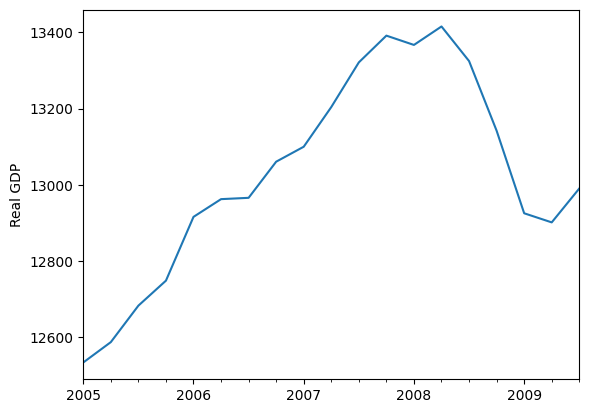

In [3]:
ax = df["realgdp"]["2005-01-01" : ].plot()
ax.autoscale(axis="x" , tight=True)
ax.set(ylabel="Real GDP")

### Usando o Statsmodels para descobrir a tendência

Usaremos a função <a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'>statsmodels.tsa.filters.hp_filter.hpfilter (X, lamb=1600)</a>

O filtro <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott</a> separa uma série temporal $y_t$ em dois componentes: o componente de tendência $\tau_t$ e o componene cíclico $c_t$

$y_t = \tau_t + c_t$

Os componentes são determinados minimizando a seguinte função de perda quadrática, onde $\lambda$ é um parâmetro de suavização.

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

O valor $\lambda$ acima lida com variações na taxa de crescimento do componente de tendência. Ao analisar dados trimestrais, recomenda-se o valor lambda padrão de 1600. Para dados anuais o valor é 6,25 e para dados mensais o valor é 129.600.

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df["realgdp"], lamb=1600)

In [5]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

Vamos agora adicionar a tendência ao nosso dataframe.

In [6]:
df["trend"] = gdp_trend

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


Agora vamos plotar o valor real do PIB (realgdp) e a tendência obtida.

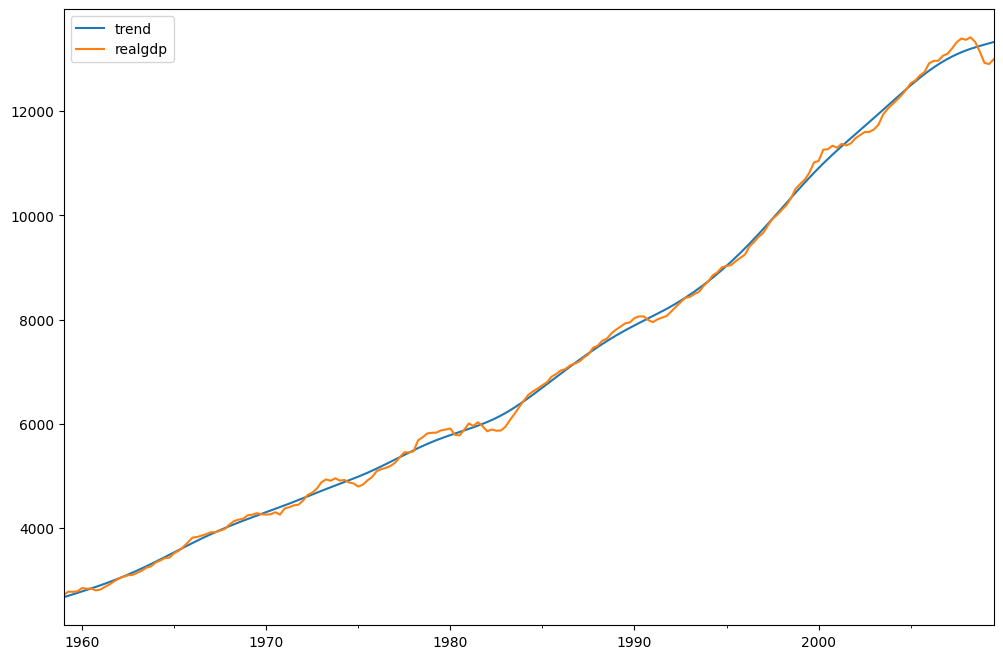

In [8]:
df[["trend"  , "realgdp"]].plot(figsize=(12,8)).autoscale(axis="x",tight=True)

Vamos agora observar os dados num período mais recente, entre 2000 e 2009. Note que em 2009 houve uma crise financeira de escala global, que atingiu mais fortemente os EUA. Isso pode ser observado claramente na figura a seguir.

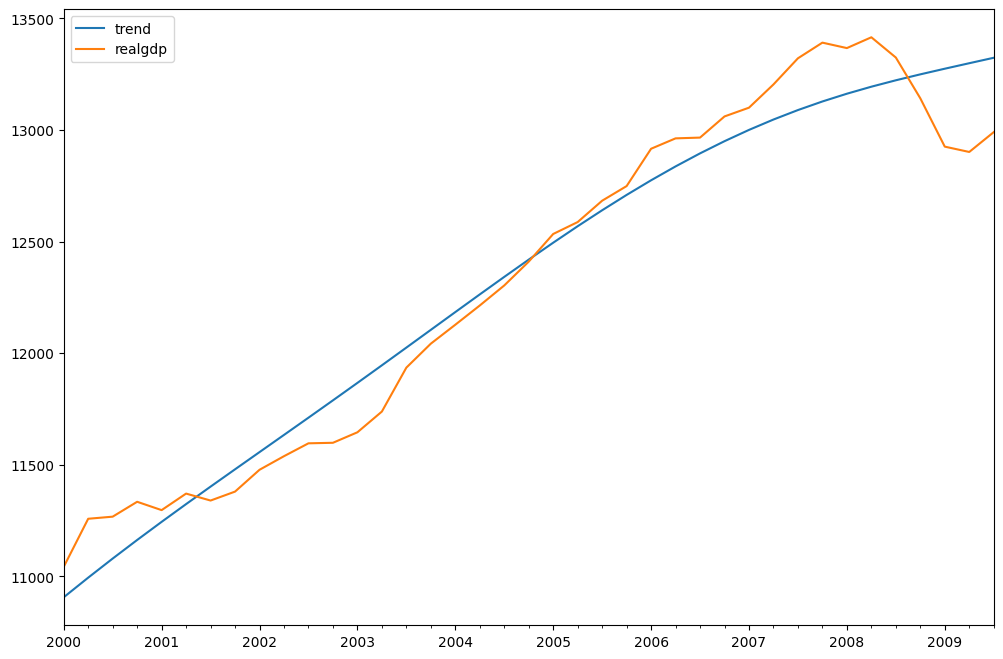

In [10]:
df[["trend"  , "realgdp"]]["2000-03-31" : ].plot(figsize=(12,8)).autoscale(axis="x",tight=True)